Social Netwwork Analysis for Statups Pacrtice Chapter 2

In [20]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import urllib as ul
import requests

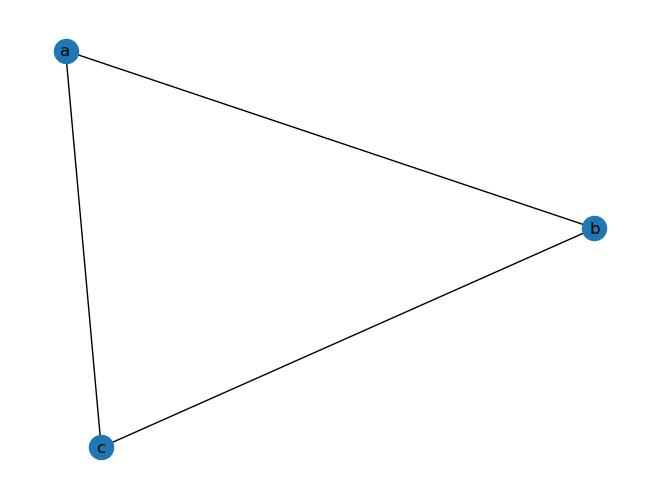

In [21]:
G = nx.Graph()
G.add_edge('a','b')
G.add_edge('b','c')
G.add_edge('c','a')
nx.draw(G, with_labels=True)
plt.show()

In [22]:
print("nodes:", G.nodes())
print("edges:", G.edges())

nodes: ['a', 'b', 'c']
edges: [('a', 'b'), ('a', 'c'), ('b', 'c')]


In [23]:
url="http://www.livejournal.com/misc/fdata.bml?user=valerois"
r = requests.get(url)
if r.status_code == 200:
    print(r.text[:500])
else:
    print("Failed to retrieve data\nStatus code:", r.status_code)

# Note: Polite data miners cache on their end.  Impolite ones get banned.
> bagira
> angerona
> yankel
> yelya
> ponka
> marinka
> saper
> levinius
> monella
> irbisa
> innaplanetyanka
> hutshepsut
> skyg74
> samoleg
> actr
> gottfrid
> krimsky
> nelis
> ptfenix
> a_u
> e_f
> boctok
> karial
> wattson
> baryshnia
> ntl
> salamandrina_
> ant_fugue
> levik
> _milashka
> oonabond
> alinaf
> vollalol
> kitobow
> petitmari
> babushonok
> koniglio
> berryl
> sylphida
> graier
> drunk_cherry
> mamarach


In [24]:
def read_lj_friends(g, name):
    # fetch the friend-list from LiveJournal
    url = "http://www.livejournal.com/misc/fdata.bml?user="
    response = requests.get(url + name)

    # walk through the lines in the response and add each one as an edge
    for line in response.text.splitlines():
        # Comments in the response start with a '#'
        if line.startswith('#'):
            continue

        parts = line.strip().split()
        if len(parts) == 0:
            continue

        # format is "< friend" (incoming) or "> friend" (outgoing)
        if parts[0] == '<':
            g.add_edge(parts[1], name)
        else:
            g.add_edge(name, parts[1])



Number of nodes: 296
Number of edges: 295


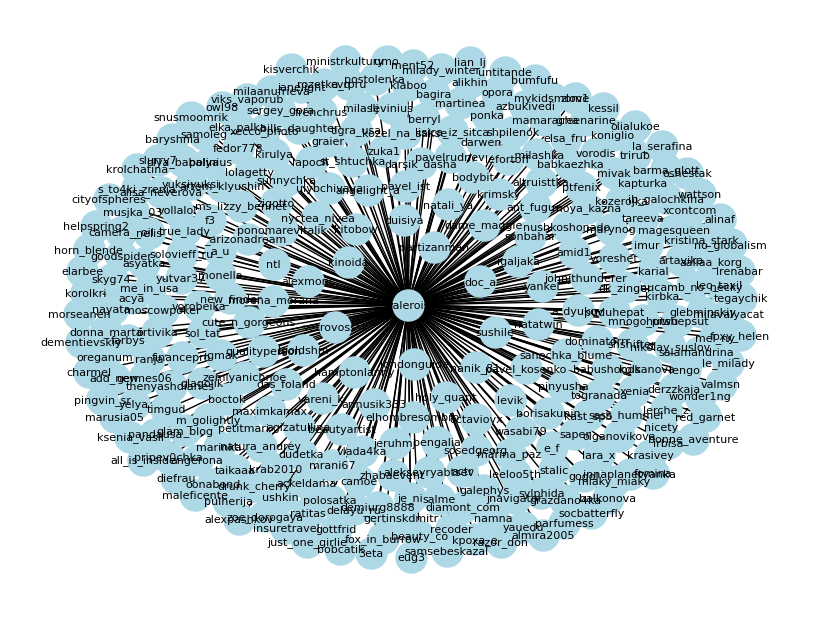

In [25]:
# Build graph
G = nx.Graph()
read_lj_friends(G, 'valerois')

# Print graph size
print("Number of nodes:", len(G.nodes))
print("Number of edges:", len(G.edges))

# Draw graph (be careful if it's huge!)
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color="lightblue", node_size=500, font_size=8)
plt.show()

In [32]:
print('nodes in G:\n',list(G.nodes)[:25])

nodes in G:
 ['valerois', 'bagira', 'angerona', 'yankel', 'yelya', 'ponka', 'marinka', 'saper', 'levinius', 'monella', 'irbisa', 'innaplanetyanka', 'hutshepsut', 'skyg74', 'samoleg', 'actr', 'gottfrid', 'krimsky', 'nelis', 'ptfenix', 'a_u', 'e_f', 'boctok', 'karial', 'wattson']


| Centrality  | Measures…                       | Social Role Example                    |
| ----------- | ------------------------------- | -------------------------------------- |
| Degree      | Direct popularity               | Person with many friends               |
| Betweenness | Brokerage/bridging power        | Connector between cliques              |
| Closeness   | Reach / efficiency              | Fast info spreader                     |
| Eigenvector | Influence of friends-of-friends | Well-connected to elites               |
| PageRank    | Weighted influence (web/social) | Viral account amplified by influencers |
